In [1]:
import PIL.Image as Image
import cv2
import numpy as np
import os

import matplotlib.pylab as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense

import pathlib                               


2024-07-10 17:17:09.356164: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_dir = pathlib.Path("./dog_cat_dataset/training_set")
test_dir=pathlib.Path("./dog_cat_dataset/testing_set")
image_size = 200  # We'll resize input images to this size
num_epochs = 1  # For real training, use num_epochs=100. 10 is a test value

print(train_dir)
print(test_dir)


dog_cat_dataset/training_set
dog_cat_dataset/testing_set


In [3]:
cat_train= list(train_dir.glob('cats/*'))
dog_train= list(train_dir.glob('dogs/*'))

print("Cat length: ", len(cat_train))
print("Dog length: ", len(dog_train))

Cat length:  4900
Dog length:  4900


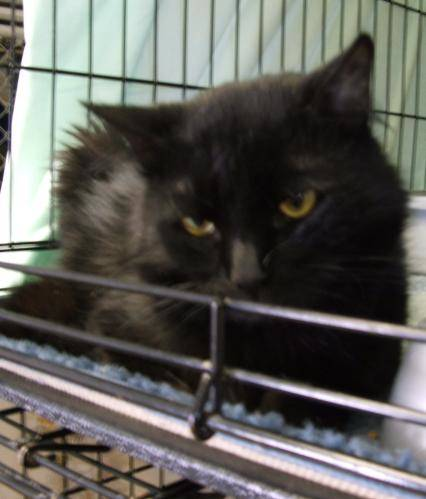

In [4]:
Image.open(str(cat_train[1245]))

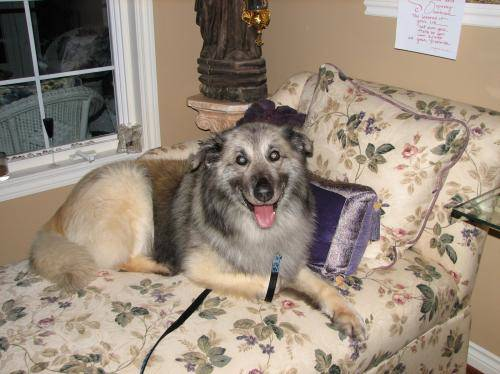

In [5]:
Image.open(str(dog_train[1569]))


In [6]:
images_dict = {
    'cats': cat_train,    
    'dogs': dog_train,
}
labels_dict = {
    'cats': 0,
    'dogs': 1,
    
}

In [7]:
images_dict["dogs"][:5]

[PosixPath('dog_cat_dataset/training_set/dogs/0071.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/4217.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/3578.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/2666.jpg'),
 PosixPath('dog_cat_dataset/training_set/dogs/2100.jpg')]

In [8]:
img= cv2.imread(str(images_dict['cats'][0]))

In [9]:
img.shape

(245, 329, 3)

In [10]:
X, y = [], []
for name,images in images_dict.items():#returns key , path for each record
    for image in images:
        if '_DS_Store' in str(image):
            print(f"Skipping _DS_Store file: {image}")
            continue
        if '.DS_Store' in str(image):
            print(f"Skipping .DS_Store file: {image}")
            continue
        img=cv2.imread(str(image))
        if img is not None:
            resize_img = cv2.resize(img, (image_size, image_size))
            X.append(resize_img)
            y.append(labels_dict[name])
        else:
            print(f"Unable to load image: {image}")


Skipping .DS_Store file: dog_cat_dataset/training_set/cats/.DS_Store
Skipping .DS_Store file: dog_cat_dataset/training_set/dogs/.DS_Store


In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
print(X.shape)
print(y)


(9798, 200, 200, 3)
[0 0 0 ... 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split
X_train, Y_train, x_label, y_label = train_test_split(X, y, test_size=0.20 ,random_state=4)

In [14]:
print(X_train.shape)
print(x_label.shape)
print(Y_train.shape)
print(y_label.shape)

(7838, 200, 200, 3)
(7838,)
(1960, 200, 200, 3)
(1960,)


In [15]:
train_images = X_train / 255.0

test_images = Y_train / 255.0


In [16]:
print(X_train[0])


[[[ 60  76 103]
  [ 59  72  94]
  [ 86  95 111]
  ...
  [201 204 201]
  [199 191 185]
  [213 212 208]]

 [[ 90 102 123]
  [ 80  88 105]
  [119 125 138]
  ...
  [204 206 203]
  [203 194 188]
  [212 211 207]]

 [[134 139 151]
  [130 133 143]
  [134 137 144]
  ...
  [202 204 201]
  [205 197 190]
  [216 215 211]]

 ...

 [[ 63  85 120]
  [ 59  86 120]
  [ 58  89 120]
  ...
  [146 151 150]
  [146 151 150]
  [148 152 151]]

 [[ 60  81 116]
  [ 55  82 116]
  [ 59  89 121]
  ...
  [143 148 147]
  [142 147 146]
  [140 146 144]]

 [[ 64  85 120]
  [ 55  82 116]
  [ 57  87 119]
  ...
  [146 151 150]
  [144 149 148]
  [145 150 148]]]


In [17]:
print(train_images[0])


[[[0.23529412 0.29803922 0.40392157]
  [0.23137255 0.28235294 0.36862745]
  [0.3372549  0.37254902 0.43529412]
  ...
  [0.78823529 0.8        0.78823529]
  [0.78039216 0.74901961 0.7254902 ]
  [0.83529412 0.83137255 0.81568627]]

 [[0.35294118 0.4        0.48235294]
  [0.31372549 0.34509804 0.41176471]
  [0.46666667 0.49019608 0.54117647]
  ...
  [0.8        0.80784314 0.79607843]
  [0.79607843 0.76078431 0.7372549 ]
  [0.83137255 0.82745098 0.81176471]]

 [[0.5254902  0.54509804 0.59215686]
  [0.50980392 0.52156863 0.56078431]
  [0.5254902  0.5372549  0.56470588]
  ...
  [0.79215686 0.8        0.78823529]
  [0.80392157 0.77254902 0.74509804]
  [0.84705882 0.84313725 0.82745098]]

 ...

 [[0.24705882 0.33333333 0.47058824]
  [0.23137255 0.3372549  0.47058824]
  [0.22745098 0.34901961 0.47058824]
  ...
  [0.57254902 0.59215686 0.58823529]
  [0.57254902 0.59215686 0.58823529]
  [0.58039216 0.59607843 0.59215686]]

 [[0.23529412 0.31764706 0.45490196]
  [0.21568627 0.32156863 0.45490196]


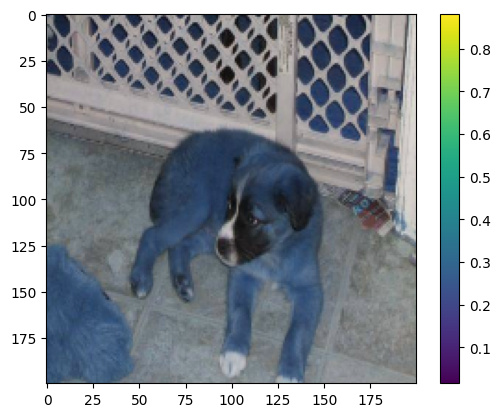

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
class_names = ['cats', 'dogs']

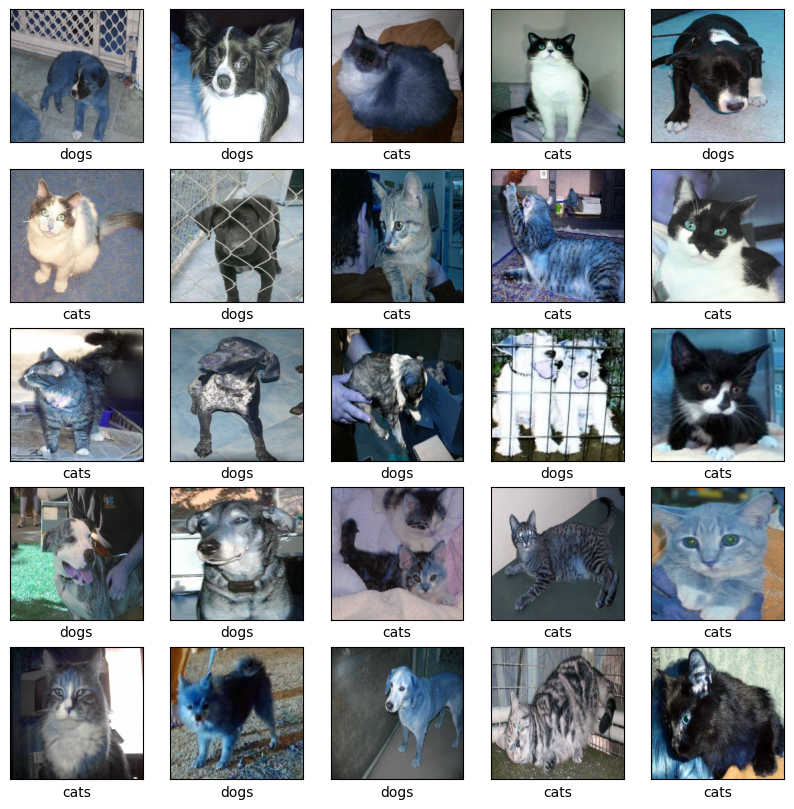

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[x_label[i]])
plt.show()

In [21]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,3))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))
model.summary()


/Users/jameslam/Desktop/tecky/ai/gpt_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,501,122 (51.50 MB)

 Trainable params: 13,499,138 (51.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
print(train_images.shape)
print(x_label.shape)

(7838, 200, 200, 3)
(7838,)


In [24]:
model.fit(train_images, x_label , epochs=num_epochs)


/Users/jameslam/Desktop/tecky/ai/gpt_env/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


245/245 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - accuracy: 0.5983 - loss: 1.0264


In [25]:
test_loss, test_acc = model.evaluate(test_images, y_label, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

62/62 - 24s - 386ms/step - accuracy: 0.4985 - loss: 0.8511

Test accuracy: 0.49846938252449036

Test loss: 0.8510657548904419


In [26]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)


62/62 ━━━━━━━━━━━━━━━━━━━━ 24s 378ms/step


In [28]:
predictions[0]


array([0.64501524, 0.35498464], dtype=float32)

In [29]:
print(predictions[0])
print("model: ", np.argmax(predictions[12]))
print("actual: ", y_label[12])


[0.64501524 0.35498464]
model:  0
actual:  0


In [30]:
print(predictions.shape)
print(y_label.shape)

(1960, 2)
(1960,)


In [31]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(2))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

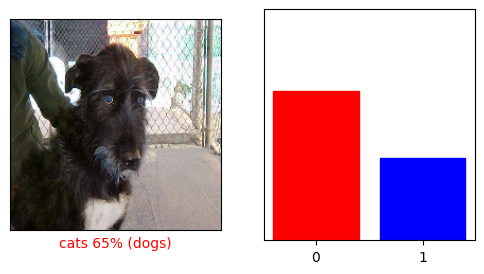

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_label)
plt.show()

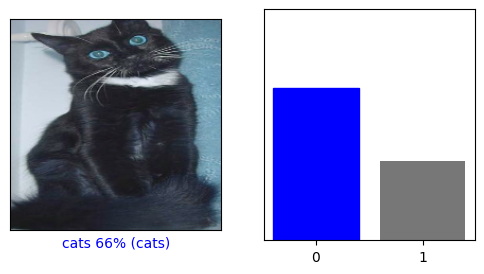

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_label)
plt.show()

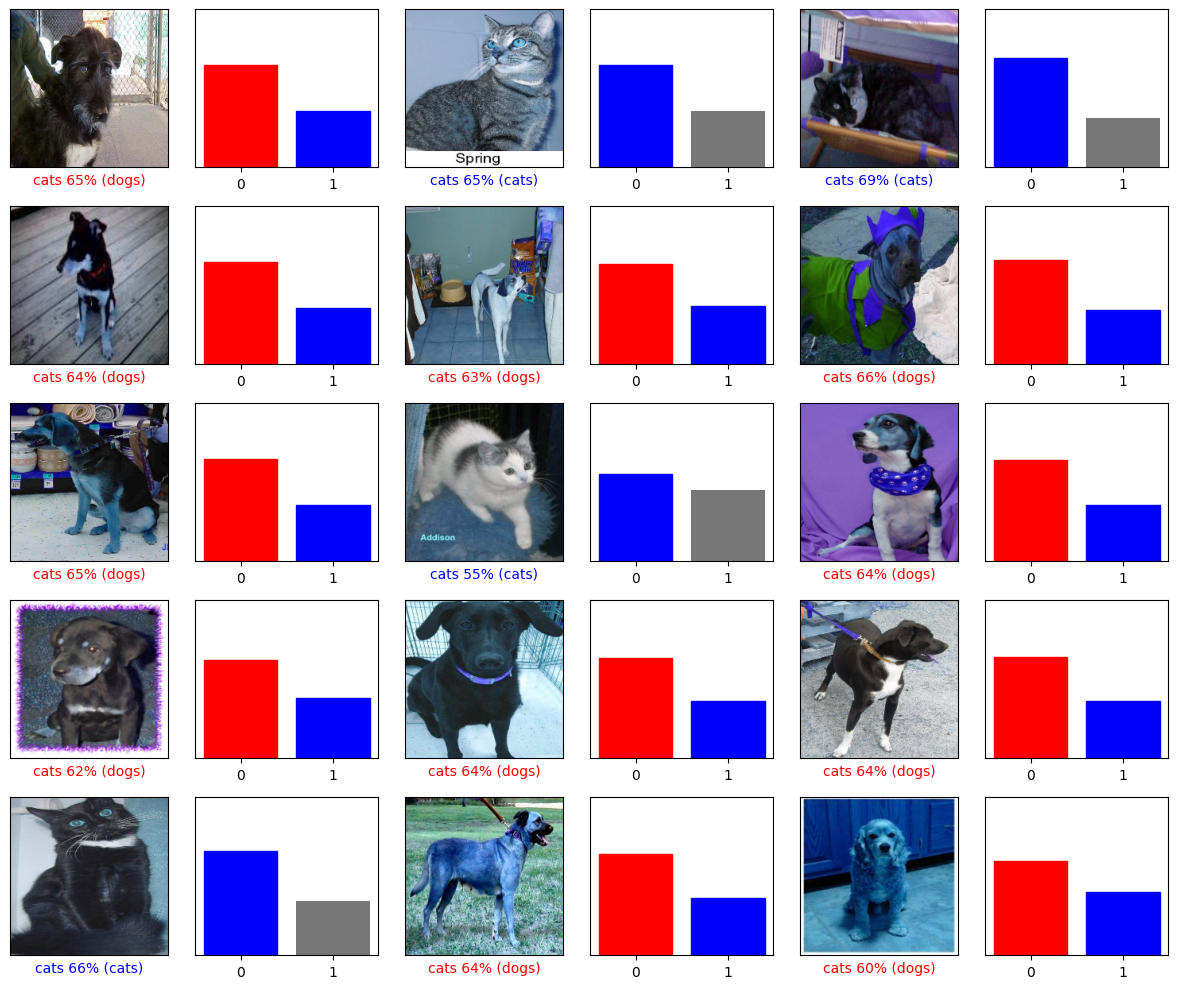

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_label, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_label)
plt.tight_layout()
plt.show()

In [35]:
cat_test= list(test_dir.glob('cats/*'))
dog_test= list(test_dir.glob('dogs/*'))

print("Cat length: ", len(cat_test))
print("Dog length: ", len(dog_test))

Cat length:  101
Dog length:  101


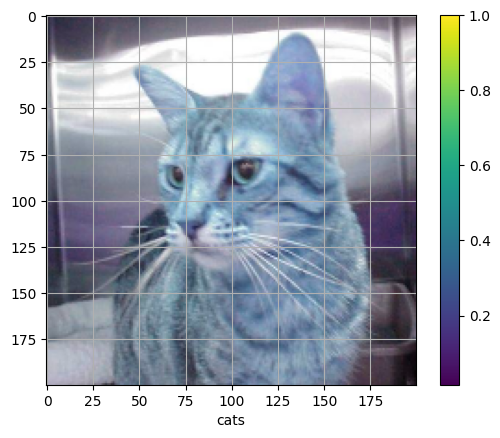

In [36]:
predict_index = 45
# Grab an image from the test dataset.
image = cat_test[predict_index]
img = cv2.imread(str(image))

resize_img = cv2.resize(img, (image_size, image_size))
resize_img = resize_img / 255.0

plt.figure()
plt.imshow(resize_img)
plt.colorbar()
plt.grid(True)
plt.xlabel(class_names[0])
plt.show()


In [37]:
# Add the image to a batch where it's the only member.
resize_img = (np.expand_dims(resize_img,0))

print(resize_img.shape)

(1, 200, 200, 3)


In [41]:
predictions_single = probability_model.predict(resize_img)
predictions_label = class_names[np.argmax(predictions_single[0])]

print(predictions_single)
print(predictions_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[0.6468043  0.35319567]]
cats


In [46]:
probability_model.save("./models/cnn.keras")
